
# INGENIERÍA DE DESCRIPTORES

Característica:Los datos utilizados para crear un modelo de conocimiento consisten en 
variables de resultado, y una serie de variables descriptoras, que contienen datos que 
se cree que determinan las variables de resultado:

    * Los datos que muestran los precios reales son la VARIABLE RESULTADO o Variable de salida
    
    * Los datos que muestran cosas que se cree que determinan los valores de las 
    propiedades, como el tamaño de la casa, el No de habitaciones y la ubicación, 
    son VARIABLES DESCRIPTORAS o variables de entrada 


<img src="How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png">

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns # data visualization library  
from matplotlib import pyplot

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Feature Extraction
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

import operator
from operator import itemgetter

import warnings
warnings.filterwarnings("ignore")


# LECTURA DE DATOS

Los datos son tomados de: 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Los datos consisten en una prueba médica donde se determina si el paciente tiene o no cáncer de seno


In [65]:
dataset = pd.read_csv('D:\ML\T1 seleccion extraccion\wdbc.csv',sep=',') #
dataset.head()

print(dataset.dtypes)

X = dataset.iloc[:,2:]
Y = dataset.iloc[:,1].to_frame()

replace_map = {"CLASS": {'M':1, 'B':-1}}
Y.replace(replace_map, inplace=True)


bc_dataset_columns = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                      'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                      'concave_points_mean', 'symmetry_mean', 'fractal_dim_mean',
                      'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                      'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
                      'fractal_dim_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                      'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                      'concave points_worst', 'symmetry_worst', 'fractal_dim_worst']


ID                       int64
CLASS                   object
radius                 float64
texture                float64
perimeter              float64
area                   float64
smoothness             float64
compactness            float64
concavity              float64
concave_points         float64
symmetry               float64
fractal_dim            float64
SEradius               float64
SEtexture              float64
SEperimeter            float64
SEarea                 float64
SEsmoothness           float64
SEcompactness          float64
SEconcavity            float64
SEconcave_points       float64
SEsymmetry             float64
SEfractal_dim          float64
Worstradius            float64
worsttexture           float64
worstperimeter         float64
worstarea              float64
worstsmoothness        float64
worstcompactness       float64
worstconcavity         float64
worstconcave_points    float64
worstsymmetry          float64
worstfractal_dim       float64
dtype: o

In [66]:
dataset

,ID,CLASS,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,Worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcave_points,worstsymmetry,worstfractal_dim
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


# FEATURE SELECTION

La selección de caracteristicas (Feature selection), es un proceso que consiste en seleccionar las características más importantes/relevantes de un conjunto de datos.

# SELECTKBEST  F_CLASIF
Selecciona las k variables con e mejor score. El k es definido por el usuario

Scores de todas las características: 
 [['concave points_worst' '964.3853934517133']
 ['perimeter_worst' '897.9442188597807']
 ['concave_points_mean' '861.6760200073146']
 ['radius_worst' '860.7817069850373']
 ['perimeter_mean' '697.235272476532']
 ['area_worst' '661.6002055336272']
 ['radius_mean' '646.9810209786473']
 ['area_mean' '573.0607465682366']
 ['concavity_mean' '533.7931262035503']
 ['concavity_worst' '436.69193940305007']
 ['compactness_mean' '313.23307856764205']
 ['compactness_worst' '304.3410629037628']
 ['radius_se' '268.8403269673446']
 ['perimeter_se' '253.89739178268252']
 ['area_se' '243.65158577774116']
 ['texture_worst' '149.59690468605072']
 ['smoothness_worst' '122.47288045844209']
 ['symmetry_worst' '118.8602321361969']
 ['texture_mean' '118.09605934497365']
 ['concave points_se' '113.26275994492413']
 ['smoothness_mean' '83.65112340843271']
 ['symmetry_mean' '69.52744350046207']
 ['fractal_dim_worst' '66.44396064959517']
 ['compactness_se' '53.24733912812024']

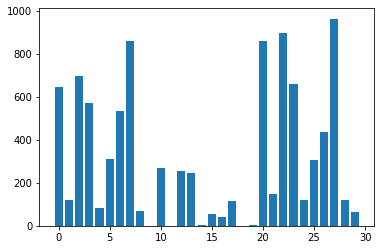

Vista de las variables seleccionadas:
 [[1.228e+02 1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [1.329e+02 7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.300e+02 1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [7.758e+01 1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.351e+02 1.043e-01 2.254e+01 1.522e+02 1.625e-01]]


In [80]:
#Feature Selection with Univariate Statistical Test---------------------------#
encabezados = bc_dataset_columns[2:]
kVAL = 5
# f_classif
test = SelectKBest(score_func=f_classif, k=kVAL)
fit = test.fit(X.values, Y.CLASS.values)
anova_X = test.get_support()
anova_V = fit.scores_
# summarize scores
i=0
feat = []

for f in fit.scores_:
  feat.append([encabezados[i],f])
  i = i+1

feat = sorted(feat, key=itemgetter(1), reverse=True)
feat = np.array(feat)

#print('Puntaje de cada característica:\n',feat)

print("Scores de todas las características: \n",feat)
selectFeat = np.take(feat,range(kVAL*2))

featCols = [a for a in encabezados if a in selectFeat]
print("\n Selected Features: \n",featCols)

#feat = np.sort(feat) 
features_1 = fit.transform(X)

# dibujar losscores
pyplot.bar([i for i in range(len(fit.scores_))], fit.scores_)
pyplot.show()


# summarize selected features
print('Vista de las variables seleccionadas:\n',features_1[0:5,:])


Scores de todas las características: 
 [['concave points_worst' '964.3853934517133']
 ['perimeter_worst' '897.9442188597807']
 ['concave_points_mean' '861.6760200073146']
 ['radius_worst' '860.7817069850373']
 ['perimeter_mean' '697.235272476532']
 ['area_worst' '661.6002055336272']
 ['radius_mean' '646.9810209786473']
 ['area_mean' '573.0607465682366']
 ['concavity_mean' '533.7931262035503']
 ['concavity_worst' '436.69193940305007']
 ['compactness_mean' '313.23307856764205']
 ['compactness_worst' '304.3410629037628']
 ['radius_se' '268.8403269673446']
 ['perimeter_se' '253.89739178268252']
 ['area_se' '243.65158577774116']
 ['texture_worst' '149.59690468605072']
 ['smoothness_worst' '122.47288045844209']
 ['symmetry_worst' '118.8602321361969']
 ['texture_mean' '118.09605934497365']
 ['concave points_se' '113.26275994492413']
 ['smoothness_mean' '83.65112340843271']
 ['symmetry_mean' '69.52744350046207']
 ['fractal_dim_worst' '66.44396064959517']
 ['compactness_se' '53.24733912812024']

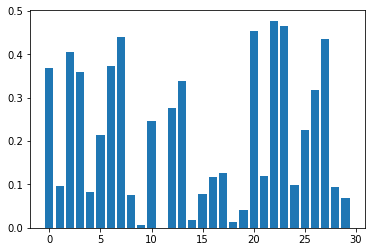


Vista de las variables seleccionadas:
 [[1.228e+02 1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [1.329e+02 7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.300e+02 1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [7.758e+01 1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.351e+02 1.043e-01 2.254e+01 1.522e+02 1.625e-01]]


In [81]:
# mutual_info_classif
kVAL1=5
test = SelectKBest(score_func=mutual_info_classif, k=kVAL1)
fit1 = test.fit(X.values, Y.CLASS.values)
info_X = test.get_support()
info_V = fit1.scores_
# summarize scores
#print('Puntaje de cada característica:\n',fit.scores_)

# summarize scores
i=0
feat1 = []
for f in fit1.scores_:
  feat1.append([encabezados[i],f])
  i = i+1

feat1 = sorted(feat1, key=itemgetter(1), reverse=True)
feat1 = np.array(feat1)
print("Scores de todas las características: \n",feat)

selectFeat = np.take(feat,range(kVAL1*2))
featCols = [a for a in encabezados if a in selectFeat]
print("\n Selected Features: \n",featCols)

features_2 = fit.transform(X.values)

# plot the scores
pyplot.bar([i for i in range(len(fit1.scores_))], fit1.scores_)
pyplot.show()
# summarize selected features
print('\nVista de las variables seleccionadas:\n',features_2[0:5,:])


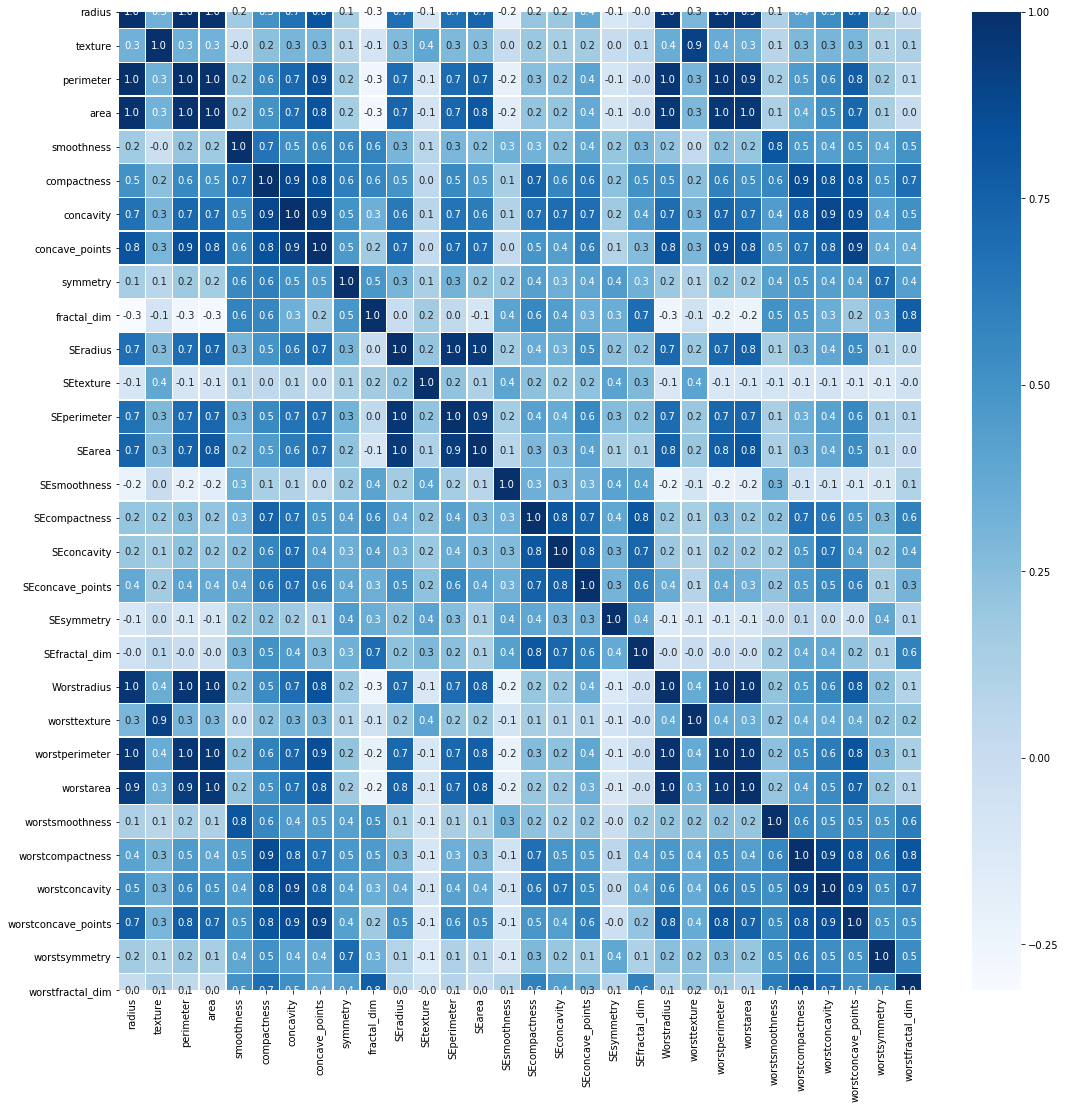

In [73]:
f,ax = pyplot.subplots(figsize=(18, 18))
sns.heatmap(X.corr(),cmap="Blues", annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [82]:
#Recursive Feature Elimination------------------------------------------------#
# Feature Selection with RFE (Recursive feature elimination) performs a greedy search to 
# find the best performing feature subset. It iteratively creates models and determines 
# the best or the worst performing feature at each iteration. It constructs the subsequent 
# models with the left features until all the features are explored.
# https://www.datacamp.com/community/tutorials/feature-selection-python
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model,5)
fit = rfe.fit(X.values, Y.CLASS.values)
rfe_X = fit.support_
rfe_V = fit.ranking_
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



Num Features: 5
Selected Features: [False False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False  True  True  True False]
Feature Ranking: [ 2  8 21 24 16  3  1  4 12 23  1  7 14  9 26 11 18 19 22 25 15  6  5 20
 17 10  1  1  1 13]


In [83]:
model = SVC(kernel="linear")
rfe = RFE(model,5, step=1)
fit = rfe.fit(X.values, Y.CLASS.values)
svc_X = fit.support_
svc_V = fit.ranking_
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True False]
Feature Ranking: [ 4 17 12 26  9  8  5  6  7 23 21  2 10 18 19 15 14 16 24 22  3 11 20 25
  1  1  1  1  1 13]


https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

L1-based feature selection

In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

print('Tamaño del dataset original',X.shape)

lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X.values, Y.CLASS.values)
model = SelectFromModel(lsvc, prefit=True, max_features=5)
X_new = model.transform(X.values)
model_LinearSVC_X = model.get_support()
model_LinearSVC_V = lsvc.coef_.flatten()
print("Selected Features: %s" % model.get_support())
print("Coef: %s" % lsvc.coef_.flatten())
print(X_new.shape)

Tamaño del dataset original (569, 30)
Selected Features: [ True False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False  True  True  True False]
Coef: [-2.11526913e-01 -2.31173689e-02 -2.30818958e-02  1.58472726e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.05184982e-01
  0.00000000e+00  3.48378555e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -7.21283336e-02  1.12175827e-01 -9.49509854e-04  4.69764544e-03
  0.00000000e+00  0.00000000e+00  9.55999268e-01  6.85162189e+00
  1.25193067e+00  0.00000000e+00]
(569, 5)


Tree-based feature selection

In [85]:
from sklearn.ensemble import ExtraTreesClassifier

print('Tamaño del dataset original',X.shape)
clf = ExtraTreesClassifier(n_estimators=50) #n_estimators: The number of trees in the forest.
clf = clf.fit(X.values, Y.CLASS.values)
print('\nImportancia de las variables:\n',clf.feature_importances_)
model = SelectFromModel(clf, prefit=True, max_features=5)
X_new = model.transform(X.values)
model_ExtraTrees_X = model.get_support()
model_ExtraTrees_V = clf.feature_importances_
print("Selected Features: %s" % model.get_support())
print('Tamaño del dataset transformado',X_new.shape)

Tamaño del dataset original (569, 30)

Importancia de las variables:
 [0.04768102 0.01414922 0.06239875 0.04341178 0.01003068 0.01530488
 0.09823315 0.10420535 0.00430335 0.00829526 0.02674798 0.00594725
 0.02012058 0.03063311 0.00532634 0.0075289  0.0055273  0.00705221
 0.00601029 0.00655866 0.05373218 0.02318253 0.11120985 0.08746196
 0.01739031 0.03280249 0.04443215 0.07674169 0.01292804 0.01065275]
Selected Features: [False False False False False False  True  True False False False False
 False False False False False False False False False False  True  True
 False False False  True False False]
Tamaño del dataset transformado (569, 5)


In [86]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_name = X.columns.tolist()
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'ANOVA':anova_X, 'INFO':info_X, 'RFE':rfe_X, 'SVC':svc_X, 'Model-ExtraTrees':model_ExtraTrees_X, 'Model-LinearSVC':model_LinearSVC_X})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df.insert(2,'ANOVA-score',anova_V)
feature_selection_df.insert(4,'INFO-score',info_V)
feature_selection_df.insert(6,'RFE-Ranking',rfe_V)
feature_selection_df.insert(8,'SVC-Ranking',svc_V)
feature_selection_df.insert(10,'Model-ExtraTrees-Imp',model_ExtraTrees_V) 
feature_selection_df.insert(12,'Model-LinearSVC-Coef',model_LinearSVC_V)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

,Feature,ANOVA,ANOVA-score,INFO,INFO-score,RFE,RFE-Ranking,SVC,SVC-Ranking,Model-ExtraTrees,Model-ExtraTrees-Imp,Model-LinearSVC,Model-LinearSVC-Coef,Total
1,worstconcave_points,True,964.385393,True,0.434877,True,1,True,1,True,0.076742,True,6.851622,6
2,worstsymmetry,False,118.860232,False,0.093117,True,1,True,1,False,0.012928,True,1.251931,3
3,worstperimeter,True,897.944219,True,0.477059,False,5,False,20,True,0.111210,False,-0.000950,3
4,worstconcavity,False,436.691939,False,0.318115,True,1,True,1,False,0.044432,True,0.955999,3
5,concave_points,True,861.676020,True,0.439246,False,4,False,6,True,0.104205,False,0.000000,3
6,worstarea,False,661.600206,True,0.464118,False,20,False,25,True,0.087462,False,0.004698,2
7,concavity,False,533.793126,False,0.373230,True,1,False,5,True,0.098233,False,0.000000,2
8,Worstradius,True,860.781707,True,0.454332,False,15,False,3,False,0.053732,False,-0.072128,2
9,worstsmoothness,False,122.472880,False,0.098320,False,17,True,1,False,0.017390,False,0.000000,1
10,worstcompactness,False,304.341063,False,0.225874,False,10,True,1,False,0.032802,False,0.000000,1


In [88]:
dfnuevo = dataset[['worstconcave_points', 'worstsymmetry','worstconcavity',\
                  'concave_points', 'Worstradius', 'worstperimeter', 'concavity', 'worstarea']].copy()

In [89]:
dfnuevo

,worstconcave_points,worstsymmetry,worstconcavity,concave_points,Worstradius,worstperimeter,concavity,worstarea
0,0.265400,0.4601,0.711900,0.147100,25.380,184.60,0.300100,2019.0
1,0.186000,0.2750,0.241600,0.070170,24.990,158.80,0.086900,1956.0
2,0.243000,0.3613,0.450400,0.127900,23.570,152.50,0.197400,1709.0
3,0.257500,0.6638,0.686900,0.105200,14.910,98.87,0.241400,567.7
4,0.162500,0.2364,0.400000,0.104300,22.540,152.20,0.198000,1575.0
5,0.174100,0.3985,0.535500,0.080890,15.470,103.40,0.157800,741.6
6,0.193200,0.3063,0.378400,0.074000,22.880,153.20,0.112700,1606.0
7,0.155600,0.3196,0.267800,0.059850,17.060,110.60,0.093660,897.0
8,0.206000,0.4378,0.539000,0.093530,15.490,106.20,0.185900,739.3
9,0.221000,0.4366,1.105000,0.085430,15.090,97.65,0.227300,711.4


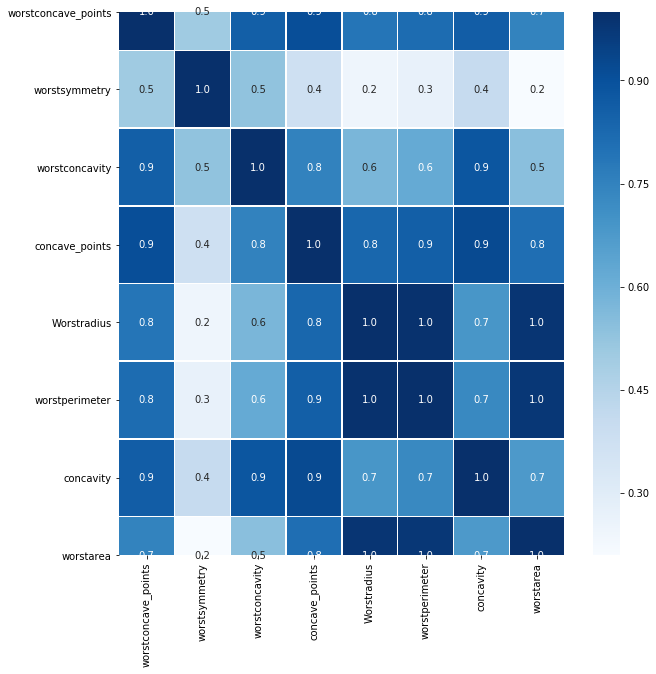

In [101]:
f,ax = pyplot.subplots(figsize=(10, 10))
sns.heatmap(dfnuevo.corr(),cmap="Blues", annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [104]:
dfnuevo1 = dataset[['worstconcave_points', 'worstsymmetry','worstconcavity',\
                  'concave_points', 'worstperimeter']].copy()

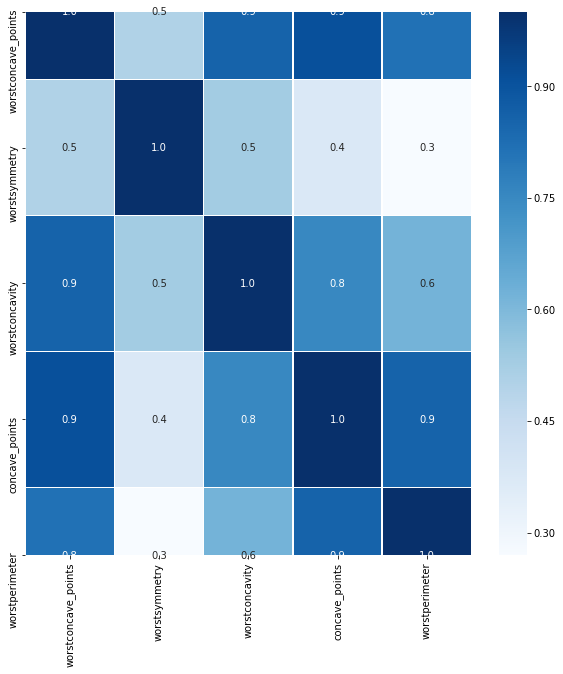

In [105]:
f,ax = pyplot.subplots(figsize=(10, 10))
sns.heatmap(dfnuevo1.corr(),cmap="Blues", annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [108]:
#best predictive accuracy obtained using one separating plane
#in the 3-D space of Worst Area, Worst Smoothness and mean Texture. 
#stimated accuracy 97.5% using repeated
#10-fold crossvalidations.  Classifier has correctly
#diagnosed 176 consecutive new patients as of November 1995. 


dfn = dataset[['smoothness', 'texture', 'worstarea']].copy()

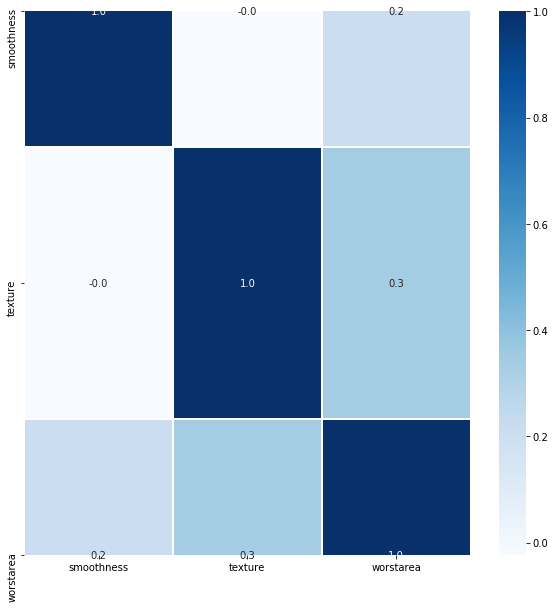

In [109]:
f,ax = pyplot.subplots(figsize=(10, 10))
sns.heatmap(dfn.corr(),cmap="Blues", annot=True, linewidths=.5, fmt= '.1f',ax=ax);